#### 0. Configurar o Ambiente

In [3]:
import os

## Google Colab
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  # Setar o diretório de trabalho
  d_geral = R'/content/drive/MyDrive/Usina Pedra/Docs Nicolella/4-Dados e documentos/Dados'
  d_usina = R'/content/drive/MyDrive/Usina Pedra/Docs Nicolella/4-Dados e documentos/Dados/Usina da Pedra'
  d_sp = R'/content/drive/MyDrive/Usina Pedra/Docs Nicolella/4-Dados e documentos/Dados/Geral do Estado de Sao Paulo'
## Windows
else:
  # Setar o diretório de trabalho
  d_geral = R'C:\Users\ferna\OneDrive\5. Trabalho\Expediente\Ativos\Consultoria\Usina Pedra\Docs Nicolella\4-Dados e documentos\Dados'
  d_usina = R'C:\Users\ferna\OneDrive\5. Trabalho\Expediente\Ativos\Consultoria\Usina Pedra\Docs Nicolella\4-Dados e documentos\Dados\Usina da Pedra'
  d_sp = R'C:\Users\ferna\OneDrive\5. Trabalho\Expediente\Ativos\Consultoria\Usina Pedra\Docs Nicolella\4-Dados e documentos\Dados\Geral do Estado de Sao Paulo'

Mounted at /content/drive


In [4]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Configurações de visualização
# Mundar largura de visualização no pandas
pd.set_option('display.width', None)

# Mudar número de colunas que aparecem
pd.set_option('display.max_columns', None)

# Mudar número de linhas que aparecem
pd.set_option('display.max_rows', None)

***


#### 1. Importar os dados e Criar o df

##### 1.1 Criar dataframe

In [5]:
if 'google.colab' in str(get_ipython()):
  df = pd.read_excel(d_usina + '/Historico de encerrados 2016 - 2023.xlsx', sheet_name='BASE_2016_2023', skiprows=1)
  df.drop(['LAYER MAPA', 'VATR SAFRA', 'NM', 'Layer safra seção'], axis=1, inplace=True)
else:
  df = pd.read_excel(d_usina + '\Historico de encerrados 2016 - 2023.xlsx', sheet_name='BASE_2016_2023', skiprows=1)
  df.drop(['LAYER MAPA', 'VATR SAFRA', 'NM', 'Layer safra seção'], axis=1, inplace=True)

##### 1.2 Formatar colunas

In [6]:
df['SAFRA'] = pd.to_datetime(df['SAFRA'], format='%Y')
df['CÓD'] = df['CÓD'].astype('category')
df['TALHÃO'] = df['TALHÃO'].astype('category')
df['ESTÁGIO'] = df['ESTÁGIO'].astype('category')
df['CORTE'] = df['CORTE'].astype('category')
df['VARIEDADE'] = df['VARIEDADE'].astype('category')
df['MÊS DE COLHEITA'] = df['MÊS DE COLHEITA'].astype('category')
# df['TON/HÁ'] = df['TON/HÁ'].astype(float): tirar dúvida por que alguns tem: "PARCERIA PLENA 30%"

##### 1.3 Visão preliminar via do df

In [7]:
# Checar se as colunas estão bem formatadas
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69418 entries, 0 to 69417
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SAFRA             69418 non-null  datetime64[ns]
 1   UNIDADE           69418 non-null  object        
 2   TIPO              69418 non-null  object        
 3   CÓD               69418 non-null  category      
 4   SEÇÃO             69418 non-null  object        
 5   TALHÃO            69417 non-null  category      
 6   ÁREA              69418 non-null  float64       
 7   ESTÁGIO           69418 non-null  category      
 8   CORTE             69418 non-null  category      
 9   VARIEDADE         69418 non-null  category      
 10  PRODUÇÃO REAL     69418 non-null  float64       
 11  TCH REAL          69418 non-null  float64       
 12  ATR               69418 non-null  float64       
 13  ATR * PRODUÇÃO    69418 non-null  float64       
 14  DATA DE COLHEITA  6941

In [8]:
# duas primeiras linhas
df.head(2)

,SAFRA,UNIDADE,TIPO,CÓD,SEÇÃO,TALHÃO,ÁREA,ESTÁGIO,CORTE,VARIEDADE,PRODUÇÃO REAL,TCH REAL,ATR,ATR * PRODUÇÃO,DATA DE COLHEITA,MÊS DE COLHEITA,PARCEIRO,TON/HÁ,KG ATR
0,2016-01-01,PEDRA,PARCERIA,10001,10001 - LAGOINHA,1.0,21.64,1A,1,RB966928,1345.438,62.17,124.85,167977.9343,2016-12-04,12,BERNARDO BIAGI E OUTRO,26.86,121.9676
1,2016-01-01,PEDRA,PARCERIA,10001,10001 - LAGOINHA,2.0,16.05,1A,1,RB966928,1146.195,71.41,124.56,142770.0492,2016-12-04,12,BERNARDO BIAGI E OUTRO,26.86,121.9676


In [9]:
# Duas últimas linhas
df.tail(2)

,SAFRA,UNIDADE,TIPO,CÓD,SEÇÃO,TALHÃO,ÁREA,ESTÁGIO,CORTE,VARIEDADE,PRODUÇÃO REAL,TCH REAL,ATR,ATR * PRODUÇÃO,DATA DE COLHEITA,MÊS DE COLHEITA,PARCEIRO,TON/HÁ,KG ATR
69416,2023-01-01,CEDRO,PARCERIA,71012,71012 - NOSSA SENHORA APARECIDA 2,7.0,23.02,1I,1,CTC4,1498.938,65.11,151.0,226339.638,2023-06-30,6,UMBERTO BIAGI CARVALHO,9.091,121.9676
69417,2023-01-01,CEDRO,PARCERIA,71012,71012 - NOSSA SENHORA APARECIDA 2,8.0,13.75,1I,1,CTC4,895.772,65.15,151.0,135261.572,2023-06-30,6,UMBERTO BIAGI CARVALHO,9.091,121.9676


In [10]:
# Descritiva dos categoricos
df.describe(include='category')

,CÓD,TALHÃO,ESTÁGIO,CORTE,VARIEDADE,MÊS DE COLHEITA
count,69418,69417.0,69418,69418,69418,69418
unique,1796,448.0,25,14,122,11
top,50004,1.0,3,3,CTC4,9
freq,1177,8115.0,14112,14736,12310,9889


In [11]:
# Descritiva dos dados quantitativos
df.describe()

,SAFRA,ÁREA,PRODUÇÃO REAL,TCH REAL,ATR,ATR * PRODUÇÃO,DATA DE COLHEITA,KG ATR
count,69418,69418.000000,69418.000000,69418.000000,69418.000000,6.941800e+04,69418,69418.000000
mean,2019-06-24 15:40:10.544815616,11.577644,900.874245,78.813921,131.551430,1.184306e+05,2020-01-20 16:37:38.180875264,121.309559
min,2016-01-01 00:00:00,0.010000,0.607000,0.150000,0.000000,0.000000e+00,2016-03-08 00:00:00,109.190000
25%,2017-01-01 00:00:00,6.090000,405.322750,56.430000,121.620000,5.140085e+04,2017-11-20 00:00:00,121.967600
50%,2020-01-01 00:00:00,10.325000,728.930500,73.780000,135.850000,9.637571e+04,2020-03-24 00:00:00,121.967600
75%,2021-01-01 00:00:00,15.660000,1197.630750,94.970000,147.890000,1.606269e+05,2021-10-16 00:00:00,121.967600
max,2023-01-01 00:00:00,298.690000,8947.830000,10459.100000,195.250000,1.138074e+06,2023-12-20 00:00:00,140.000000
std,NaN,7.357393,702.466171,82.781249,28.387423,9.484242e+04,NaN,3.001175


In [12]:
# Valores em branco por coluna
missing_values = df.isnull().sum()
print(missing_values)

SAFRA               0
UNIDADE             0
TIPO                0
CÓD                 0
SEÇÃO               0
TALHÃO              1
ÁREA                0
ESTÁGIO             0
CORTE               0
VARIEDADE           0
PRODUÇÃO REAL       0
TCH REAL            0
ATR                 0
ATR * PRODUÇÃO      0
DATA DE COLHEITA    0
MÊS DE COLHEITA     0
PARCEIRO            0
TON/HÁ              0
KG ATR              0
dtype: int64


In [13]:
# Valores nulos por coluna
null_values = df.isnull().sum()
print(null_values)

SAFRA               0
UNIDADE             0
TIPO                0
CÓD                 0
SEÇÃO               0
TALHÃO              1
ÁREA                0
ESTÁGIO             0
CORTE               0
VARIEDADE           0
PRODUÇÃO REAL       0
TCH REAL            0
ATR                 0
ATR * PRODUÇÃO      0
DATA DE COLHEITA    0
MÊS DE COLHEITA     0
PARCEIRO            0
TON/HÁ              0
KG ATR              0
dtype: int64


***


#### 2. Visão preliminar

In [14]:
df.head(2)

,SAFRA,UNIDADE,TIPO,CÓD,SEÇÃO,TALHÃO,ÁREA,ESTÁGIO,CORTE,VARIEDADE,PRODUÇÃO REAL,TCH REAL,ATR,ATR * PRODUÇÃO,DATA DE COLHEITA,MÊS DE COLHEITA,PARCEIRO,TON/HÁ,KG ATR
0,2016-01-01,PEDRA,PARCERIA,10001,10001 - LAGOINHA,1.0,21.64,1A,1,RB966928,1345.438,62.17,124.85,167977.9343,2016-12-04,12,BERNARDO BIAGI E OUTRO,26.86,121.9676
1,2016-01-01,PEDRA,PARCERIA,10001,10001 - LAGOINHA,2.0,16.05,1A,1,RB966928,1146.195,71.41,124.56,142770.0492,2016-12-04,12,BERNARDO BIAGI E OUTRO,26.86,121.9676


##### 2.1 Descrição das colunas

In [15]:
## Colunas

# (Q)* SAFRA: Ano da safra
# (C) UNIDADE: Nome do local da produção/colheita
# (C) TIPO: Tipo de contrato (Parceria ou Arrendamento)
# (C) CÓD: Código da unidade de beneficiamento (???) --> 1801 diferentes
# (C) SEÇÃO: Unidade de beneficiamento (???) --> são 1801
# (C) TALHÃO: Porção de terra onde a cana foi plantada --> 448 diferentes
# (Q) ÁREA: Tamanho da área plantada (ha)
# (C) ESTÁGIO: (???) --> 25 diferentes
# (C) CORTE: (???) --> 14 diferentes
# (C) VARIEDADE: (???) --> 122 diferentes
# (Q) PRODUÇÃO REAL: total colheita (kg)
# (Q) TCH REAL: Tonelada de cana por hectare (kg)
# (Q) ATR: Açúcar Total Recuperável (kg)
# (Q) ATR*PRODUÇÃO: (PRODUÇÃO REAL*ATR) (kg)
# (Q) DATA DE COLHEITA: AE
# (C) MÊS DE COLHEITA: AE
# (C) PARCEIRO: Nome do produtor parceiro --> 1.726 diferentes
# (Q) TON/HÁ: (???) ==> muitos valores repetidos
# (Q) KG ATR: (???) ==> muitos valores repetidos

# Estes dados poderão ser utilizados em I

In [16]:
df.tail(2)

,SAFRA,UNIDADE,TIPO,CÓD,SEÇÃO,TALHÃO,ÁREA,ESTÁGIO,CORTE,VARIEDADE,PRODUÇÃO REAL,TCH REAL,ATR,ATR * PRODUÇÃO,DATA DE COLHEITA,MÊS DE COLHEITA,PARCEIRO,TON/HÁ,KG ATR
69416,2023-01-01,CEDRO,PARCERIA,71012,71012 - NOSSA SENHORA APARECIDA 2,7.0,23.02,1I,1,CTC4,1498.938,65.11,151.0,226339.638,2023-06-30,6,UMBERTO BIAGI CARVALHO,9.091,121.9676
69417,2023-01-01,CEDRO,PARCERIA,71012,71012 - NOSSA SENHORA APARECIDA 2,8.0,13.75,1I,1,CTC4,895.772,65.15,151.0,135261.572,2023-06-30,6,UMBERTO BIAGI CARVALHO,9.091,121.9676


#### 3. AED

##### 3.1 Dados categóricos

In [17]:
# 1. UNIDADE: Nome do local da produção/colheita
# 2. TIPO: Tipo de contrato (Parceria ou Arrendamento)
# 3. CÓD: Código da unidade de beneficiamento (???) --> 1801 diferentes
# 4. SEÇÃO: Unidade de beneficiamento (???) --> são 1801
# 5. TALHÃO: Porção de terra onde a cana foi plantada --> 448 diferentes
# 6. ESTÁGIO: (???) --> 25 diferentes
# 7. CORTE: (???) --> 14 diferentes
# 8. VARIEDADE: (???) --> 122 diferentes
# 9. MÊS DE COLHEITA: AE
# 10. PARCEIRO: Nome do produtor parceiro --> 1.726 diferentes

###### 1. UNIDADE

In [18]:
## 1. UNIDADE
df['UNIDADE'].value_counts()

# Nome do local da produção/colheita


UNIDADE
PEDRA     29119
IPÊ       20308
BURITI    19875
CEDRO       116
Name: count, dtype: int64

In [19]:
## 1. UNIDADE
df['UNIDADE'].value_counts(normalize=True, ascending=False)

# Nome do local da produção/colheita

UNIDADE
PEDRA     0.419473
IPÊ       0.292547
BURITI    0.286309
CEDRO     0.001671
Name: proportion, dtype: float64

In [20]:
## UNIDADE
# A unidade de produção mais frequente é a Usina da Pedra (~41%), com as unidades
# Usina Ipê (~29%) e Usina Buriti (~29%) representando juntas 58% das colheitas.
# De forma quase simbólica, a Usina Cedro representa 0,1% das colheitas.

###### 2. TIPO

###### 3. CÓD

In [21]:
## CÓD
# Código da unidade de beneficiamento (???)
df['CÓD'].nunique()

#  1801 diferentes

1796

###### 4. SEÇÃO

###### 5. TALHÃO

In [22]:
## TALHÃO
# Porção de terra onde a cana foi plantada
df['TALHÃO'].nunique()

#  448 diferentes

448

###### 6. ESTÁGIO

In [23]:
## ESTÁGIO: (???) --> 25 diferentes

###### 7. CORTE

In [24]:

## CORTE: (???) --> 14 diferentes


###### 8. VARIEDADE

In [25]:
## VARIEDADE: (???) --> 122 diferentes

###### 9. MÊS DE COLHEITA

In [26]:
## MÊS DE COLHEITA
df['MÊS DE COLHEITA'].unique()


[12, 4, 5, 10, 11, ..., 8, 7, 6, 3, 2]
Length: 11
Categories (11, int64): [2, 3, 4, 5, ..., 9, 10, 11, 12]

In [27]:
## MÊS DE COLHEITA
df['MÊS DE COLHEITA'].value_counts(normalize=False)

MÊS DE COLHEITA
9     9889
7     9060
8     8799
10    8490
5     8310
6     7631
4     7627
11    5594
3     2021
12    1995
2        2
Name: count, dtype: int64

In [28]:
## MÊS DE COLHEITA
df['MÊS DE COLHEITA'].value_counts(normalize=True, ascending=False)

MÊS DE COLHEITA
9     0.142456
7     0.130514
8     0.126754
10    0.122303
5     0.119710
6     0.109928
4     0.109871
11    0.080584
3     0.029113
12    0.028739
2     0.000029
Name: proportion, dtype: float64

In [29]:
## MÊS DE COLHEITA
# As colheitas são bem divididas ao longo do ano, sendo menores entre dezembro e fevereiro

###### 10. PARCEIRO

In [30]:
## PARCEIRO
# Diferentes parceiros
df['PARCEIRO'].nunique()

# 1.726 parceiros diferentes

1726

In [80]:
## PARCEIRO
# Produção real (kg) / total colhido por parceiro
# df.groupby('PARCEIRO')['PRODUÇÃO REAL'].sum().sort_values(ascending=False)

In [81]:
## PARCEIRO
# ATR (kg) / total produzido em açúcar por parceiro
# df.groupby('PARCEIRO')['ATR'].sum().sort_values(ascending=False)

In [82]:
## PARCEIRO
# Qtde absoluta de colheitas por parceiro
# df['PARCEIRO'].value_counts()

In [83]:
## PARCEIRO
# Qtde relativa de colheitas por parceiro
# df['PARCEIRO'].value_counts(normalize=True)

##### 3.2 Dados Quantitativos

In [36]:
## Colunas

# 1. SAFRA: Ano da safra
# 2. ÁREA: Tamanho da área plantada (ha)
# 3. PRODUÇÃO REAL: total colheita (kg)
# 4. TCH REAL: Tonelada de cana por hectare (kg)
# 5. ATR: Açúcar Total Recuperável (kg)
# 6. ATR*PRODUÇÃO: (PRODUÇÃO REAL*ATR) (kg)
# 7. DATA DE COLHEITA: AE
# 8. TON/HÁ: (???) ==> muitos valores repetidos
# 9. KG ATR: (???) ==> muitos valores repetidos


In [37]:
df.head(2)

,SAFRA,UNIDADE,TIPO,CÓD,SEÇÃO,TALHÃO,ÁREA,ESTÁGIO,CORTE,VARIEDADE,PRODUÇÃO REAL,TCH REAL,ATR,ATR * PRODUÇÃO,DATA DE COLHEITA,MÊS DE COLHEITA,PARCEIRO,TON/HÁ,KG ATR
0,2016-01-01,PEDRA,PARCERIA,10001,10001 - LAGOINHA,1.0,21.64,1A,1,RB966928,1345.438,62.17,124.85,167977.9343,2016-12-04,12,BERNARDO BIAGI E OUTRO,26.86,121.9676
1,2016-01-01,PEDRA,PARCERIA,10001,10001 - LAGOINHA,2.0,16.05,1A,1,RB966928,1146.195,71.41,124.56,142770.0492,2016-12-04,12,BERNARDO BIAGI E OUTRO,26.86,121.9676


###### 1. SAFRA

In [38]:
## SAFRA
# [qtde]
# Ano da safra / nr de colheitas registradas

df['SAFRA'].value_counts(ascending=True)

SAFRA
2023-01-01    8233
2019-01-01    8320
2018-01-01    8342
2022-01-01    8514
2017-01-01    8658
2020-01-01    8923
2016-01-01    9085
2021-01-01    9343
Name: count, dtype: int64

In [39]:
## SAFRA
# Ano da safra / nr de colheitas registradas

df['SAFRA'].value_counts(normalize=True, ascending=True)

SAFRA
2023-01-01    0.118600
2019-01-01    0.119854
2018-01-01    0.120171
2022-01-01    0.122648
2017-01-01    0.124723
2020-01-01    0.128540
2016-01-01    0.130874
2021-01-01    0.134590
Name: proportion, dtype: float64

In [40]:
## SAFRA
# A produção se manteve relativamente estável ao longo dos anos.

###### 2. ÁREA

In [41]:
## ÁREA
# [ha]
# Tamanho da área plantada (ha)

In [42]:
df['ÁREA'].describe()

count    69418.000000
mean        11.577644
std          7.357393
min          0.010000
25%          6.090000
50%         10.325000
75%         15.660000
max        298.690000
Name: ÁREA, dtype: float64

In [43]:
df['ÁREA'].mode()

0    10.0
Name: ÁREA, dtype: float64

<Axes: xlabel='ÁREA', ylabel='Count'>

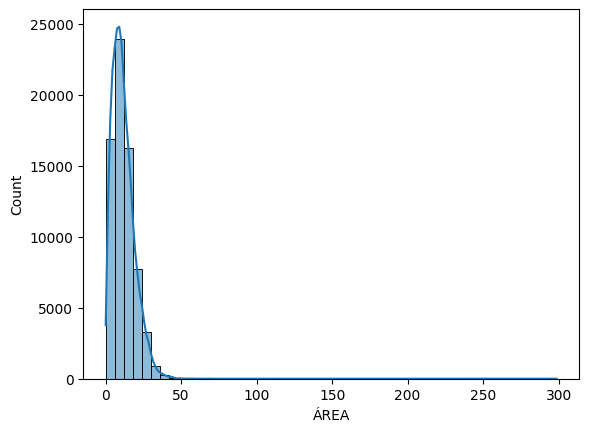

In [44]:
sns.histplot(df['ÁREA'], bins=50, kde=True)

<Axes: ylabel='ÁREA'>

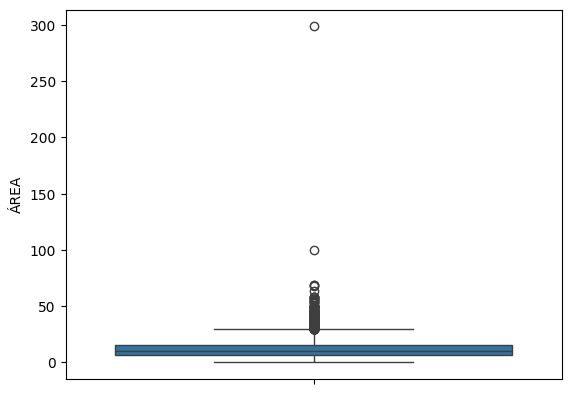

In [45]:
sns.boxplot(df['ÁREA'])

In [46]:
# Média colhida por safra e ÁREA
df.groupby('SAFRA')['ÁREA'].mean()

SAFRA
2016-01-01    10.070674
2017-01-01    10.347468
2018-01-01    10.890388
2019-01-01    11.515847
2020-01-01    11.826935
2021-01-01    12.469047
2022-01-01    12.783824
2023-01-01    12.763931
Name: ÁREA, dtype: float64

In [47]:
# Total colhida por safra
df.groupby('SAFRA')['ÁREA'].sum()

SAFRA
2016-01-01     91492.07
2017-01-01     89588.38
2018-01-01     90847.62
2019-01-01     95811.85
2020-01-01    105531.74
2021-01-01    116498.31
2022-01-01    108841.48
2023-01-01    105085.44
Name: ÁREA, dtype: float64

In [48]:
# Os parceiros possuem áreas relativamente pequenas (10-11 ha), com alguns outliers.

###### 3. PRODUÇÃO REAL

In [49]:
## PRODUÇÃO REAL
# [kg]
# total colheita (kg) por parceiro

In [50]:
df['PRODUÇÃO REAL'].describe()

count    69418.000000
mean       900.874245
std        702.466171
min          0.607000
25%        405.322750
50%        728.930500
75%       1197.630750
max       8947.830000
Name: PRODUÇÃO REAL, dtype: float64

In [51]:
df['PRODUÇÃO REAL'].mode()

0    210.755
Name: PRODUÇÃO REAL, dtype: float64

<Axes: xlabel='PRODUÇÃO REAL', ylabel='Count'>

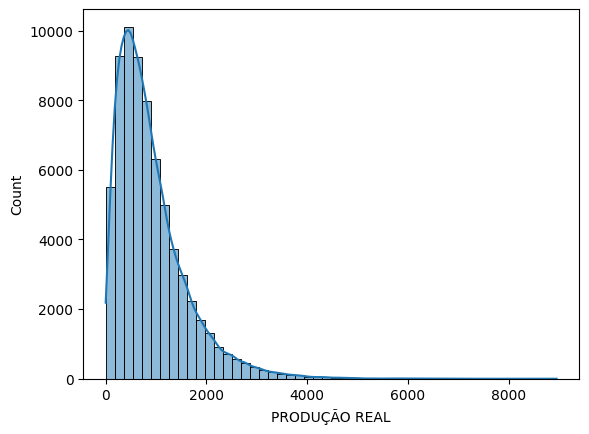

In [52]:
sns.histplot(df['PRODUÇÃO REAL'], bins=50, kde=True)

<Axes: ylabel='PRODUÇÃO REAL'>

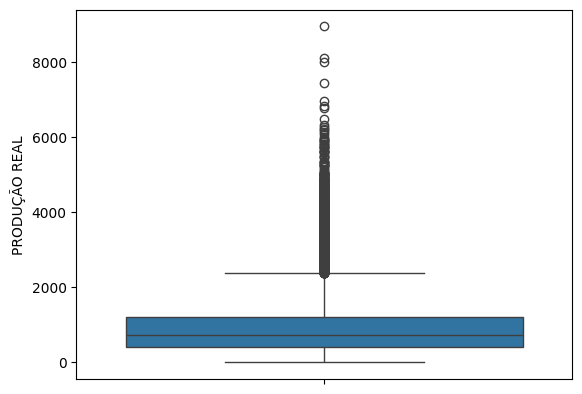

In [53]:
sns.boxplot(df['PRODUÇÃO REAL'])

In [54]:
# Produção média por safra
df.groupby('SAFRA')['PRODUÇÃO REAL'].mean()

SAFRA
2016-01-01     837.999742
2017-01-01     778.562685
2018-01-01     809.884338
2019-01-01     927.931528
2020-01-01     961.744543
2021-01-01     835.098882
2022-01-01     868.521843
2023-01-01    1205.860457
Name: PRODUÇÃO REAL, dtype: float64

In [55]:
# Média de produção por tipo de parceria
df.groupby('TIPO')['PRODUÇÃO REAL'].mean()

TIPO
ARRENDAMENTO    552.820769
PARCERIA        900.939438
Name: PRODUÇÃO REAL, dtype: float64

In [56]:
# Soma de produção (kg) por tipo de parceria
df.groupby('TIPO')['PRODUÇÃO REAL'].sum().apply(lambda x: f'{x:,.0f}')

TIPO
ARRENDAMENTO         7,187
PARCERIA        62,529,702
Name: PRODUÇÃO REAL, dtype: object

In [57]:
# - A produção fica geralmente entre ~700 e 900~ kg, com alguns outliers.
# - A produção média por safra se manteve relativamente estável ao longo dos anos,
# exceto por 2023, que teve aumento de ~39% em relação a 2022.
# - Praticamente toda a produção é feita por parceria (99,99%).


###### 4. TCH REAL

In [58]:
# TCH REAL
# [ton/ha]
# Tonelada de cana por hectare (ton/ha)

In [59]:
df['TCH REAL'].describe()

count    69418.000000
mean        78.813921
std         82.781249
min          0.150000
25%         56.430000
50%         73.780000
75%         94.970000
max      10459.100000
Name: TCH REAL, dtype: float64

In [60]:
df['TCH REAL'].mode()

0    75.08
Name: TCH REAL, dtype: float64

<Axes: xlabel='TCH REAL', ylabel='Count'>

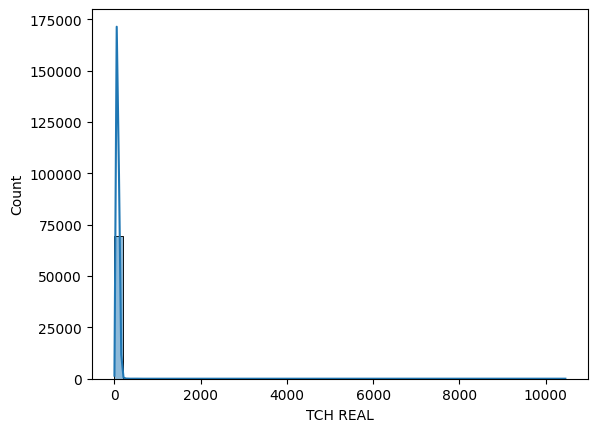

In [61]:
sns.histplot(df['TCH REAL'], bins=50, kde=True)

<Axes: ylabel='TCH REAL'>

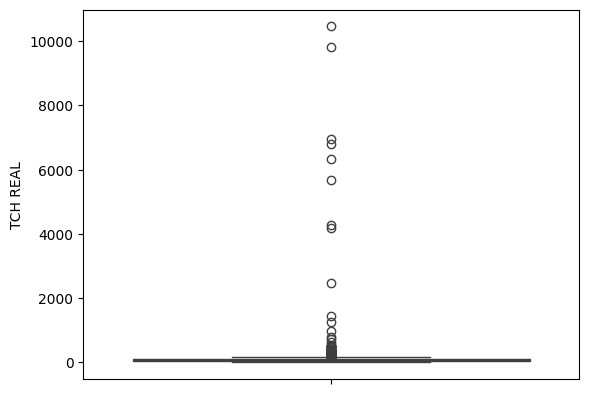

In [62]:
sns.boxplot(df['TCH REAL'])

SAFRA
2016-01-01    84.010226
2017-01-01    76.723097
2018-01-01    74.452475
2019-01-01    84.643653
2020-01-01    82.300185
2021-01-01    67.524584
2022-01-01    69.255977
2023-01-01    92.723606
Name: TCH REAL, dtype: float64

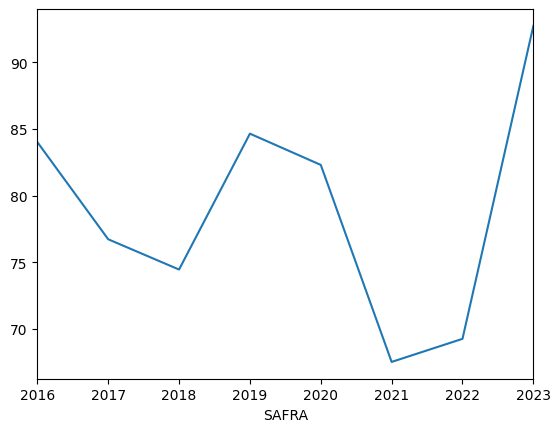

In [63]:
df.groupby('SAFRA')['TCH REAL'].mean().plot()
df.groupby('SAFRA')['TCH REAL'].mean()

<Axes: xlabel='PARCEIRO'>

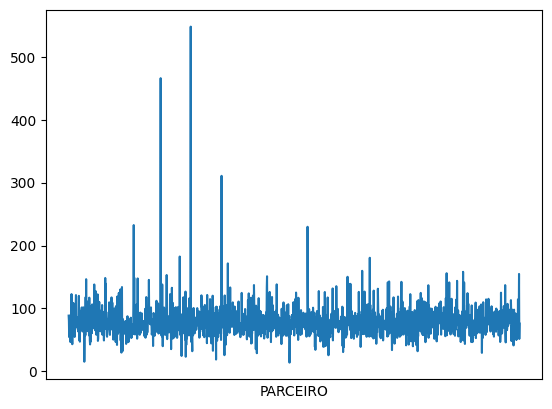

In [64]:
df.groupby('PARCEIRO')['TCH REAL'].mean().plot(xticks=[])

In [65]:
# - A produtividade por ha é relativamente estável ao longo dos anos, com média de ~78 ton/ha,
# variando de ~70 a ~85 ton/ha.
# - A produtividade não varia muito entre parceiros.

###### 5. ATR

In [66]:
## ATR
# [kg]
# Açúcar Total Recuperável (kg)

In [67]:
df['ATR'].describe()

count    69418.000000
mean       131.551430
std         28.387423
min          0.000000
25%        121.620000
50%        135.850000
75%        147.890000
max        195.250000
Name: ATR, dtype: float64

In [70]:
df['ATR'].mode()

0    0.0
Name: ATR, dtype: float64

In [71]:
# linhas possuem valor 0 em df['ATR']
(df['ATR'] == 0).sum()

# Muita informação faltando nessa coluna?

2053

In [79]:
# linhas possuem valor 0 em df['ATR']
 (df['ATR'] == 0).sum()/len(df)

0.029574461955112506

<Axes: xlabel='ATR', ylabel='Count'>

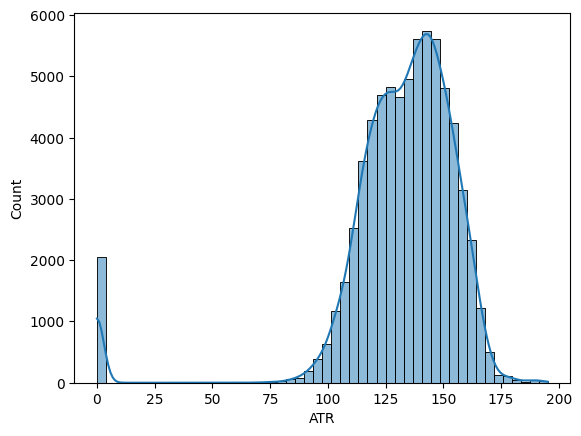

In [72]:
sns.histplot(df['ATR'], bins=50, kde=True)

<Axes: ylabel='TCH REAL'>

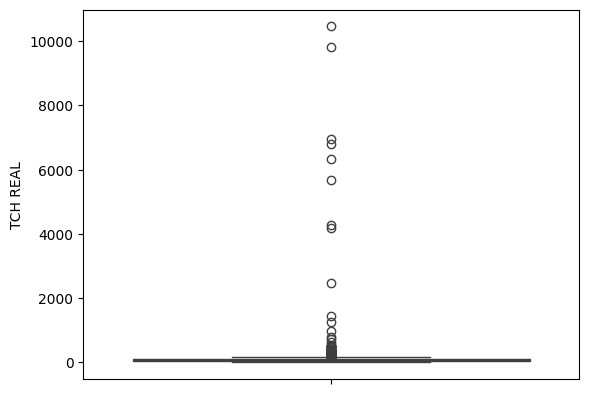

In [73]:
sns.boxplot(df['TCH REAL'])

SAFRA
2016-01-01    123.646754
2017-01-01    125.464573
2018-01-01    130.540939
2019-01-01    133.955725
2020-01-01    141.180809
2021-01-01    134.904292
2022-01-01    133.831388
2023-01-01    128.670279
Name: ATR, dtype: float64

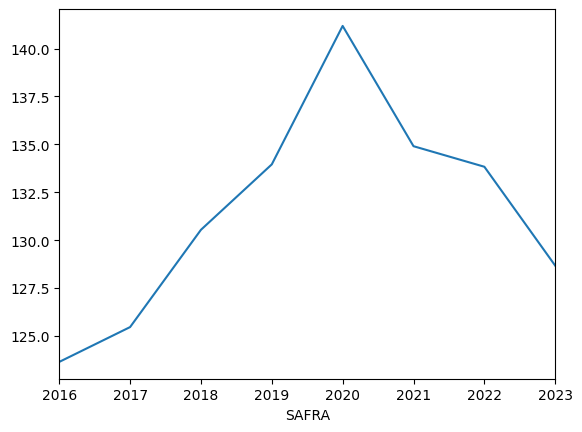

In [74]:
df.groupby('SAFRA')['ATR'].mean().plot()
df.groupby('SAFRA')['ATR'].mean()

<Axes: xlabel='PARCEIRO'>

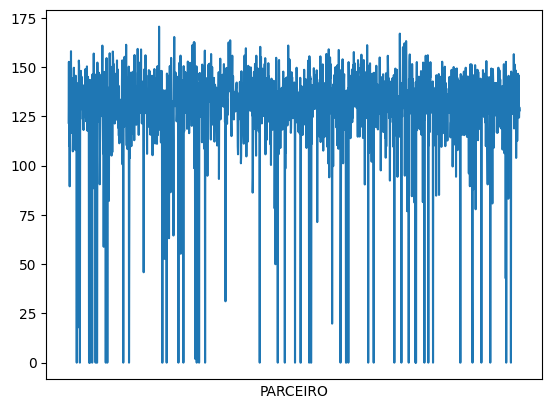

In [75]:
df.groupby('PARCEIRO')['ATR'].mean().plot(xticks=[])

In [ ]:
# - ATR (em kg) com baixa variabilidade, na faixa e ~120 a ~150.
# - Muitos valores em branco (~3% do total). Investigar se é normal.
# - Valores relativamente estáveis por safra.
# - A produtividade não varia muito entre parceiros (mas há exceções).

###### 6. ATR*PRODUÇÃO

###### 7. DATA DE COLHEITA

###### 8. TON/HÁ

In [68]:
# muitos valores repetidos

###### 9. KG ATR

In [69]:
# muitos valores repetidos